In [1]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
import access_br_dwgd
from statsmodels.tsa.stattools import adfuller


Dados carregados com sucesso para a estação: 2552000
Total de 5122 dias válidos no período selecionado.


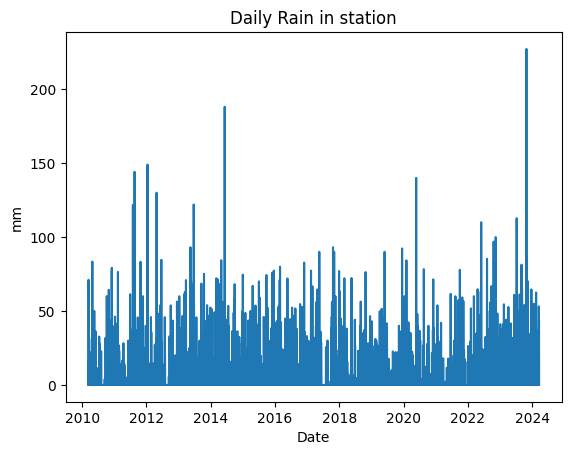

In [2]:

timeseries = access_br_dwgd.recuperar_dados_br_dwgd(False)

train_size = int(len(timeseries) * 0.60)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]
plt.plot(timeseries)
plt.title('Daily Rain in station')
plt.xlabel('Date')
plt.ylabel('mm')
plt.show()


In [3]:
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(timeseries)

1. ADF :  -38.72480892822511
2. P-Value :  0.0
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression: 5119
5. Critical Values :
	 1% :  -3.4316280977119353
	 5% :  -2.8621047838723723
	 10% :  -2.567070634643483


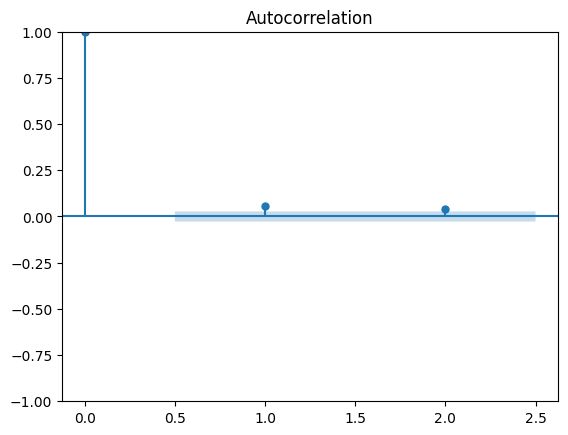

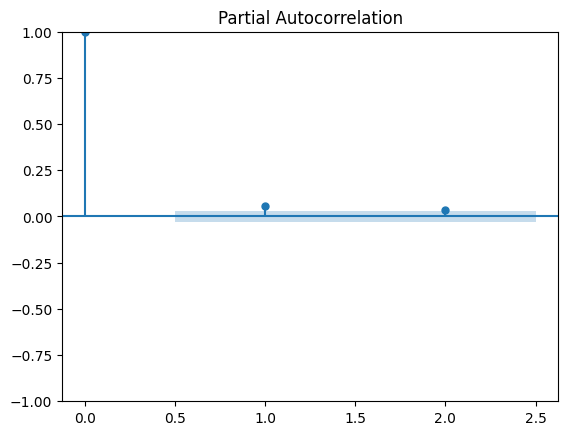

In [4]:
plot_acf(timeseries, lags=2)
plot_pacf(timeseries, lags=2)
plt.show()

In [ ]:
#ARIMA AUTO
model = ARIMA(train, order=(2, 1, 1))
model = model.fit()
test_forecast = model.forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.values, index=test.index)


rmse = sqrt(mean_squared_error(test_forecast, test))
print('RMSE:', rmse)


/home/pbose/tcc/pesquisa/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/pbose/tcc/pesquisa/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/pbose/tcc/pesquisa/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[4.51790629 4.91759236 5.13906654 ... 5.19097955 5.19097955 5.19097955]
RMSE: 14.509760455027855


/home/pbose/tcc/pesquisa/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/pbose/tcc/pesquisa/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


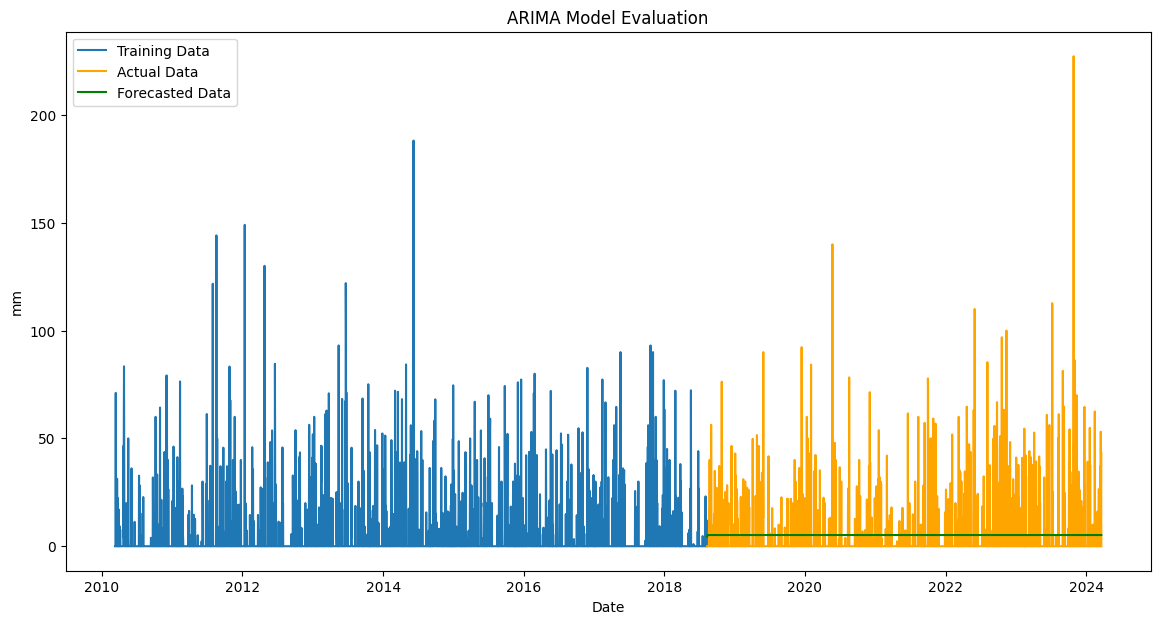

In [16]:

# Plot
plt.figure(figsize=(14,7))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')

plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('mm')
plt.legend()
plt.show()
